<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Experimenting with Inflation
</h1>

In [23]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os
import pycel
from pycel import ExcelCompiler
import pandas as pd


filename = r'simple simulator unemployment.xlsx'
plt.style.use('seaborn-poster')
display(widgets.HTML('''<style>
    .widget-label { min-width: min-content !important; }
</style>'''))
style = {'description_width': 'initial'}

HTML(value='<style>\n    .widget-label { min-width: min-content !important; }\n</style>')

In [24]:
excel = ExcelCompiler(filename=filename,cycles=True)

Initialized with cycles: True, while workbook says: False


In [25]:
shock_size = excel.evaluate('simulator!L7')
no_policy = excel.evaluate('simulator!A1:J30')
before_policy = excel.evaluate('simulator!A1:J6')
after_policy = excel.evaluate('simulator!A1:J7')
# to display use display(); for dataframe have to save and open with pandas

In [26]:
def PlotStuff(exceloutputs:list, title, after = False, show=True, auto=False, legend=False, shockline=True, shocktext=False, recoverytext=False):
    '''Plots inflation and unemployment on side-by-side subplots'''
    colourlist = ['#f05a5b', 'grey', 'pink']
    figs, axs = plt.subplots(1, 4, figsize=[24, 8])
    for data in exceloutputs:
        colour = colourlist[exceloutputs.index(data)]
        if after:
            axs[0].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][4] for i in range(1, len(data)-1)], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][3] for i in range(1, len(data)-1)], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data)-1)], [100*data[i][-1] for i in range(1, len(data)-1)], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-2)], [data[i][-3] for i in range(1, len(data)-2)], colour)
            axs[0].plot([data[-2][0], data[-1][0]], [data[-2][4], data[-1][4]], 'black')
            axs[1].plot([data[-2][0], data[-1][0]], [data[-2][3], data[-1][3]], 'black')
            axs[2].plot([data[-2][0], data[-1][0]], [100*data[-2][-1], 100*data[-1][-1]], 'black')
            axs[3].plot([data[-3][0], data[-2][0]], [data[-3][-3], data[-2][-3]], 'black')
            axs[3].set_xlim(left=0.75, right=6.25)

        else:
            axs[0].plot([data[i][0] for i in range(1, len(data))], [data[i][4] for i in range(1, len(data))], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data))], [data[i][3] for i in range(1, len(data))], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data))], [100*data[i][-1] for i in range(1, len(data))], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][-3] for i in range(1, len(data)-1)], colour)
            axs[0].plot(data[-1][0] + 1, data[-1][4])
            axs[1].plot(data[-1][0] + 1, data[-1][3])
            axs[2].plot(data[-1][0] + 1, 100*data[-1][-1])
            axs[3].plot(data[-1][0] + 1, data[-1][-3])
    axs[0].set_title('Inflation %')
    axs[1].set_title('GDP')
    axs[2].set_title('Unemployment %')
    axs[3].set_title('Real Interest Rate %')
    axs[0].set_xlabel('Period')
    axs[1].set_xlabel('Period')
    axs[2].set_xlabel('Period')
    axs[3].set_xlabel('Period')
    if shockline:
        axs[0].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[1].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[2].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[3].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[0].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[1].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[2].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[3].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
    if shocktext:
        axs[0].text(x=3.85, y=8.16, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[1].text(x=3.85, y=100.675, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[2].text(x=3.85, y=11.175, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[3].text(x=3.85, y=7.675, s='SHOCK', rotation='vertical', horizontalalignment='center')
    if recoverytext:
            axs[0].text(x=5.3, y=8.15, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[1].text(x=5.3, y=100.625, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[2].text(x=5.3, y=11.125, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[3].text(x=5.3, y=7.625, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')


    if not auto:
        axs[0].set_ylim(bottom=1.5, top=9)
        axs[1].set_ylim(bottom=93.5, top=101.5)
        axs[2].set_ylim(bottom=4, top=12)
        axs[3].set_ylim(bottom=0.5, top=8.5)


    figs.suptitle(title, fontsize=16)
    
    if legend:
        label1 = mlines.Line2D([], [], color='#f05a5b', label='chosen props')
        label2 = mlines.Line2D([], [], color='grey', label='benchmark props')
        axs[0].legend(handles=[label1, label2], bbox_to_anchor=(0.8, 1.2))
        # axs[0].legend(handles=[label1, label2])

    if show:
        plt.show()
    else:
        return figs, axs

def AppendtoPlot(figs, axs, new_excel):
    axs[0].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][4] for i in range(1, len(new_excel))])
    axs[1].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][3] for i in range(1, len(new_excel))])
    axs[2].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-1] for i in range(1, len(new_excel))])
    axs[3].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-3] for i in range(1, len(new_excel))])
    return figs, axs
    


[video]

INTRO - EXPLAIN THE SHOCK WE'RE ANALYSING, EXPLAIN HOW RELEVANT IT IS, ETC

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    NO POLICY
</h2>

<h3>An Inflation Shock with no policy response leads to an extreme inflation spiral</h3>

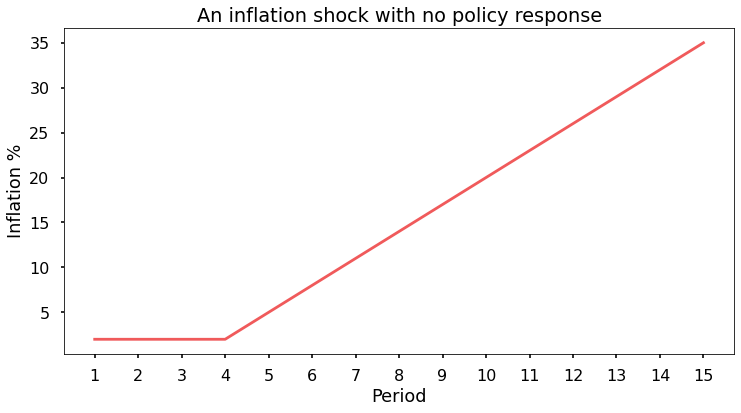

In [27]:
fig, ax = plt.subplots(1, 1, figsize = [12, 6])
ax.plot([no_policy[i][0] for i in range(1, 16)], [no_policy[i][4] for i in range(1, 16)], '#f05a5b')
ax.set_title('An inflation shock with no policy response')
ax.set_ylabel('Inflation %')
ax.set_xlabel('Period')
ax.xaxis.set_ticks(range(1, 16))

plt.show()

When the price of oil increases, inflation goes up in the shock period due to the increase in the price of fuel for consumers and the pass-through of the increase in firms’ costs to final prices. This increase in inflation has two effects relevant for next period: 

* First, it reduces the purchasing power of workers, setting workers’ real wage below the level consistent with the state of the labour market. [The real wage shown by the PS curve falls below the real wage on the WS curve. i.e., the PS curve shifts down.] 
* Second, the increase in inflation increases inflation expectations for the future. [The PC curve shifts up.] 

Due to these two effects, second period nominal wages increase faster both to offset the loss in purchasing power due to the unexpected increase in past inflation and to avoid erosion of purchasing power due to higher expected inflation. Wage setters are frustrated in the attempt to restore the real wage to its initial level [on the WS curve]. Firms pass on the increase in unit labour costs arising from the rise in nominal wages to final prices to sustain their profit margin, increasing inflation above expected inflation. Therefore, in the third and following periods the attempt to restore workers’ purchasing power will maintain nominal wage growth and inflation above expected inflation, fueling an inflation spiral.

<h2 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    YOU CHOOSE MONETARY POLICY REACTION 
</h2>

<h3>There's been a permanent inflation shock in period 5. Choose a real interest rate to see its effect - you should aim to stabilise inflation.</h3>

In [28]:
out = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [29]:
r = widgets.IntSlider(1, 1, 7, description='Post-Shock Interest Rate')
sub = widgets.Button(description='Submit')


with out:
    out.clear_output(wait=True)
    display(r, sub)
    # display(before_policy)
    PlotStuff([before_policy], title='', shocktext=True, recoverytext=True, auto=False)


def on_sub(b):
    excel.evaluate('simulator!H6')
    chosenrate = r.value
    excel.set_value('simulator!H6', chosenrate)
    excel.recalculate()
    after_policy = excel.evaluate('simulator!A1:J7')
    with out:
        out.clear_output(wait=True)
        display(r, sub)
        print(f'chosen rate {chosenrate} - see below for its effects')
        # display(excel.evaluate('simulator!H6'))
        # display(after_policy)
        PlotStuff([after_policy], title='', after=True, shocktext=True, recoverytext=True, auto=False)
        if chosenrate == 4:
            display(widgets.HTML('<h3>You have stabilised inflation - congratulations. This is because you have chosen an interest rate equal to the stabilizing real interest rate [on the IS curve at the new lower equilibrium level of output]. However, your success in stopping the inflation spiral has been at the expense of an increase in unemployment.</h3>'))
            display(widgets.HTML('<p>Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage, although of lower magnitude than the erosion in real wage caused by the oil shock. [This is a move along the WS curve.] Now the wage-setting real wage exactly matches the real wage consistent with firms\' price-setting behaviour and the higher oil price [on the lower PS curve]. Therefore, after your policy choice nominal wage growth and therefore actual inflation are equal to expected and past inflation. This is why inflation remains constant. [The PC curve does not shift upward.] </p>'))
            display(widgets.HTML('<h4>You have stabilized inflation but unemployment is higher and inflation, although stable, is higher than the central bank\'s target, which we assume was the pre-existing rate of inflation. </h4>'))
            print()
        elif 1 <= chosenrate < 4:
            display(widgets.HTML('<h3>Inflation is still getting higher, and meanwhile unemployment is getting worse too! </h3>'))
            display(widgets.HTML('<p>This is because you have chosen an interest rate lower than the stabilizing level. Therefore, you have not stopped the inflation spiral, although it proceeds more slowly after your policy choice. [The stabilizing real interest rate has gone up because equilibrium output is now lower.]</p>'))
            display(widgets.HTML('<p>By increasing the interest rate, you have reduced aggregate demand. With lower demand for final goods and services, firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage, although of lower magnitude than the erosion in real wage caused by the oil shock. [This is a move along the WS curve.] Therefore, after the policy choice the wage-setting real wage is still higher than the real wage consistent with firms\' price-setting behaviour [the wage on the WS is still above that on the on the lower PS curve] and conditions in the labour market meant that wage setters still seek to increase the purchasing power of workers. Thus, they set nominal wage growth (and effectively, inflation) above expected and past inflation. This is why inflation is still on an upwards path, although a more moderate one due to the partial acceptance as a result of higher unemployment of the dent made in real wages by the shock.</p>'))
            display(widgets.HTML('<h4>With your policy choice you have driven the economy to a stagflation scenario, that is, a situation that combines an increase in both inflation and unemployment. </h4>'))
            print()
        elif 4 < chosenrate < 7:
            display(widgets.HTML('<h3>Inflation is heading back down to the central bank\'s target. This is because you have chosen an interest rate higher than the stabilizing level. However, employment is tanking due to your policy choice.</h3>'))
            display(widgets.HTML('<p>Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services, firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage [a move along the WS curve]. This effect is so strong that now the wage-setting real wage is lower than the real wage consistent with firms\' price-setting behaviour and the higher oil price [on the lower PS curve]. The acceptance – due to the deterioration in the labour market – of further reductions in the real wage translates into setting nominal wage growth (and effectually inflation) below expected and past inflation. This is why inflation falls [the PC shifts down].</p>'))
            display(widgets.HTML('<h4>Despite your policy having reduced inflation, this is still higher than its pre-shock value. In the following periods you would need to keep the interest rate above its stabilizing level to drive inflation back to its pre-shock value (the central bank\'s target). [the PC would keep shifting down period by period]</h4>'))
            print()
        elif chosenrate == 7:
            display(widgets.HTML('<h3>You have chosen an interest rate higher than the equilibrium level and enough to drive inflation back to its pre-shock value. However, the cost of your policy shock in terms of unemployment is the highest.</h3>'))
            display(widgets.HTML('<p>Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage [a move along the WS curve]. This effect is so strong that now the wage-setting real wage is lower than the real wage consistent with firms\' price-setting behaviour and the higher oil price [on the lower PS curve]. The acceptance – due to the deterioration in the labour market – of further reductions in the real wage translates into setting nominal wage growth (and effectually inflation) below expected and past inflation. This is why inflation falls [the PC shifts down].</p>'))
            display(widgets.HTML('<h4>Since you have hit the pre-shock inflation value (the central bank\'s target), then in the following period you would just need to adjust the interest rate to its equilibrium level. This is a ‘shock therapy\' approach to the problem. </h4>'))
            print()


sub.on_click(on_sub)


<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
   COMPARING DIFFERENT REACTIONS BY THE CENTRAL BANK TO AN OIL SHOCK 
</h1>

<h3>Idea is to compare short run/long term benefits/costs of each approach, and realise costly recession is "best"</h3>

UPDATE TEXT HERE!!!

In [30]:
excel1 = ExcelCompiler(filename=filename,cycles=True)
excel1.evaluate('simulator!H6')
excel1.set_value('simulator!H6', 1)
excel1.recalculate()
no_change_policy = excel1.evaluate('simulator!A1:J30')
excel2 = ExcelCompiler(filename='simple sim endog cb.xlsx', cycles=True)
timid_policy = excel2.evaluate('timid!A1:K30')
optimal_policy = excel2.evaluate('optimal!A1:K30')


Initialized with cycles: True, while workbook says: False
Initialized with cycles: True, while workbook says: False


In [31]:
out2 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out2)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [32]:
title = widgets.HTML('<h1> Comparing types of central banks </h1>')
dropdown = widgets.Dropdown(options=['Select an option from below', 'CB that wants to avoid higher unemployment despite equilibrium change',
 'CB that slowly accepts change to unemployment', 
 'CB that accepts costly recession and unemployment below equilibrium to prioritise inflation'], value='Select an option from below', layout={'width': 'max-content'}, description='')

def get_plots(CB):
    if CB == 'CB that wants to avoid higher unemployment despite equilibrium change':
        PlotStuff([no_change_policy[:15]], title='CB that wants to avoid change to unemployment despite equilibrium change', after=False, auto=False)
        display(widgets.HTML('<h2>Leaving policy unchanged is not sustainable</h2>'))
        display(widgets.HTML('<p>As shown previously, an unchanged interest rate ensures an unsustainable inflation spiral.</p>'))
    elif CB == 'CB that slowly accepts change to unemployment':
        PlotStuff([timid_policy[:15]], title='CB that slowly accepts change to unemployment',after=False)
        display(widgets.HTML('<h2>A slow response has short term benefits with a soft landing, at the expense of permanently high inflation</h2>'))
        display(widgets.HTML('<p>In this case, the central bank slowly adjusts from below the policy rate to its equilibrium level. The increases in the interest rate are not enough to drive inflation down since the interest rate is always below its stabilizing value. As a result, inflation keeps increasing. Eventually, inflation stabilizes at a level above its pre-shock value when the interest rate hits its equilibrium value. At this point, high inflation is entrenched by higher inflation expectations resulting from a prolonged period of excess inflation.</p>'))
        display(widgets.HTML('<p>It can be seen that in the short run this policy option may seem attractive, since it implies that neither inflation nor unemployment is very high. However, in the medium run it implies both excess inflation and higher unemployment.</p>'))
    elif CB == 'CB that accepts costly recession and unemployment below equilibrium to prioritise inflation':
        PlotStuff([optimal_policy[:15]], title='CB that accepts costly recession and unemployment below equilibrium to prioritise inflation', after=False)
        display(widgets.HTML('<h2>A costly recession, engineered by the CB with high interest rates, brings inflation under control but could be </h2>'))
        display(widgets.HTML('<p>In this case, the central bank responds quickly and strongly to the oil shock, increasing the interest rate above its equilibrium value from the outset. The short run sacrifice in terms of unemployment is severe, but it is necessary if the central bank wants to wipe out the effects of the shock on inflation. Doing this, the central bank avoids a permanent increase in inflation expectations, which allows a relaxation of monetary policy in the medium run to the new equilibrium at higher unemployment and a higher stabilizing interest rate. </p>'))
    else:
        display(widgets.HTML('<h3>Choose a CB behaviour from the Dropdown to see its performance, benefits and costs</h3>'))


with out2:
    out2.clear_output(wait=True)
    display(title)
    widgets.interact(get_plots, CB=dropdown)
    # display(inter)
    # PlotStuff(no_change_policy[:15], title='CB that wants to avoid change to unemployment despite equilibrium change', after=False)
    # PlotStuff(timid_policy[:15], title='CB that slowly accepts change to unemployment',after=False)
    # PlotStuff(optimal_policy[:15], title='CB that accepts costly recession and unemployment below equilibrium to prioritise inflation', after=False)


STILL NEED TEXT HERE

In [33]:
qout3 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
qout3

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [34]:
df3 = pd.read_excel('questionsexcel.xlsx', index_col='id').iloc[:2]
qs3 = {}
ans3 = {}
msgs3 = {}

for i in df3.index:
    qs3[i] = [df3.loc[i]['question'], df3.loc[i]['c1'], df3.loc[i]['c2'], df3.loc[i]['c3']]
    ans3[i] = [df3.loc[i]['a1'], df3.loc[i]['a2'], df3.loc[i]['a3']]
    msgs3[i] = [df3.loc[i]['message1'], df3.loc[i]['message2'], df3.loc[i]['message3']]

wlist3 = {}
for q in qs3:
    wlist3[q] = [qs3[q][0]]
    for i in range(1, 4):
        wlist3[q].append(widgets.Checkbox(description=qs3[q][i], style=style, layout=widgets.Layout(min_width='min-content')))

qout3.clear_output()
sub3 = widgets.Button(description='Submit')


with qout3:
    for q in wlist3:
        display(widgets.HTML(value=f'<h4>{wlist3[q][0]}</h4>'))
        for i in wlist3[q][1:]:
            display(i)
        print()
    display(sub3)


def on_sub3(b):
    global ans3
    global msgs3
    qout3.clear_output(wait=True)
    messages = {}
    for q in wlist3:
        messages[q] = []
        for i in wlist3[q][1:]:
            answer = i.value
        for i in range(1, 4):
            answer = wlist3[q][i].value
            if answer == ans3[q][i-1]:
                messages[q].append(('CORRECT', msgs3[q][i-1]))
            else:
                messages[q].append(('INCORRECT', msgs3[q][i-1]))    
    with qout3:
        # print('sub3mitted')
        for q in wlist3:
            display(widgets.HTML(value=f'<h3>{wlist3[q][0]}</h3>'))
            for i in range(1, 4):
                display(wlist3[q][i])
                if messages[q][i-1][0] == 'CORRECT':
                    display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                else:
                    display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            print()
            # print(messages[q])
        display(sub3)

sub3.on_click(on_sub3)

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    A CENTRAL BANK WITH AN EXPLICIT LOSS FUNCTION AND INFLATION TARGET: EXPERIMENTING WITH THE POLICY MAKER’S AVERSION TO INFLATION 
</h1>

<h3>Now that it's clear how a costly recession is necessary, we introduce CB beta and how inflation aversion affects CB behaviour. </h3>

In the previous section we saw that oil shocks imply a trade-off for the central bank between inflation and unemployment. In this section we show that the way this trade-off is dealt with depends on the central bank’s degree of inflation aversion. [The CB uses the MR curve to determine its interest rate reaction to the shock.]

A benchmark is set where the central bank places the same weight on deviations of inflation from its target and of unemployment from equilibrium. [beta is equal to one in the CB’s loss function]

In [35]:
out3 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out3)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

Output()

Output()

In [44]:
out3.clear_output()
def betafunc(slider, show_benchmark):
    # global figs, axs
    excel2.evaluate('optimal!M3')
    chosenrate = slider
    excel2.set_value('optimal!M3', chosenrate)
    excel2.recalculate()
    after_policy = excel2.evaluate('optimal!A1:K30')
    if chosenrate < 1:
        message = "With lower values of beta, price stability becomes less important. Therefore, the central bank implements a weaker monetary policy reaction, which has a lesser effect on unemployment at the expense of a slower correction in excess inflation."
    elif chosenrate > 1:
        message = "With a value for beta higher than the benchmark price stability becomes more important. The central bank wants to curb excess inflation quicker, which requires a stronger increase in the interest rate and, therefore, a higher short run sacrifice in terms of unemployment. "
    else:
        message = ''
    if show_benchmark:
        PlotStuff([after_policy[:15], optimal_policy[:15]], title='', after=False, auto=False, legend=True)
        display(widgets.HTML(f'<h3>{message}</h3>'))
    else:
        PlotStuff([after_policy[:15]], title='', after=False, auto=False)
        display(widgets.HTML(f'<h3>{message}</h3>'))


beta = widgets.FloatSlider(1, min=0.25, max=4, step=0.25, description='CB beta')
benchmark = widgets.Checkbox(value=True, description='Show benchmark (beta=1)')
outtest = widgets.interactive_output(betafunc, {'slider': beta, 'show_benchmark': benchmark})

with out3:
    out3.clear_output()
    display(beta, benchmark, outtest)



In [37]:
qout4 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
qout4

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [38]:
df4 = pd.read_excel('questionsexcel.xlsx', index_col='id').iloc[2].to_frame().transpose()
qs4 = {}
ans4 = {}
msgs4 = {}

for i in df4.index:
    qs4[i] = [df4.loc[i]['question'], df4.loc[i]['c1'], df4.loc[i]['c2'], df4.loc[i]['c3']]
    ans4[i] = [df4.loc[i]['a1'], df4.loc[i]['a2'], df4.loc[i]['a3']]
    msgs4[i] = [df4.loc[i]['message1'], df4.loc[i]['message2'], df4.loc[i]['message3']]

wlist4 = {}
for q in qs4:
    wlist4[q] = [qs4[q][0]]
    for i in range(1, 4):
        wlist4[q].append(widgets.Checkbox(description=qs4[q][i], style=style, layout=widgets.Layout(min_width='min-content')))

qout4.clear_output()
sub4 = widgets.Button(description='Submit')


with qout4:
    for q in wlist4:
        display(widgets.HTML(value=f'<h4>{wlist4[q][0]}</h4>'))
        for i in wlist4[q][1:]:
            display(i)
        print()
    display(sub4)


def on_sub4(b):
    global ans4
    global msgs4
    qout4.clear_output(wait=True)
    messages = {}
    for q in wlist4:
        messages[q] = []
        for i in wlist4[q][1:]:
            answer = i.value
        for i in range(1, 4):
            answer = wlist4[q][i].value
            if answer == ans4[q][i-1]:
                messages[q].append(('CORRECT', msgs4[q][i-1]))
            else:
                messages[q].append(('INCORRECT', msgs4[q][i-1]))    
    with qout4:
        # print('sub4mitted')
        for q in wlist4:
            display(widgets.HTML(value=f'<h4>{wlist4[q][0]}</h4>'))
            for i in range(1, 4):
                display(wlist4[q][i])
                if messages[q][i-1][0] == 'CORRECT':
                    display(widgets.HTML(f'<div style="background-color: rgb(161, 240, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                else:
                    display(widgets.HTML(f'<div style="background-color: rgb(241, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            print()
            # print(messages[q])
        display(sub4)

sub4.on_click(on_sub4)

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    EXPERIMENTING WITH DIFFERENT INFLATION EXPECTATIONS FORMATION PROCESSES: ANCHORING VS INERTIA
</h1>

<h3>Inflation recovery is not just dependent on CB. Households and firms' expectations about inflation affect their behaviour. Explain how this relates to CB credibility. Then have interactive widget to show how CB credibility affects optimal response. </h3>

Anchoring of inflation expectations relaxes the short run trade-off between inflation and unemployment that the central bank faces when dealing with an oil shock.

The case with no anchoring is set as a benchmark and it matches with the cases considered in previous section [standard PC with expected inflation equal to last period’s inflation].


In [39]:
excel3 = ExcelCompiler('simple sim endog cb inflation expectations.xlsx', cycles=True)

Initialized with cycles: True, while workbook says: False


In [40]:
out4 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
display(out4)

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

Output()

In [41]:
def credfunc(slider, show_benchmark):
    # global figs, axs
    excel3.evaluate('optimal!M8')
    chosenrate = slider
    excel3.set_value('optimal!M8', chosenrate)
    excel3.recalculate()
    after_policy = excel3.evaluate('optimal!A1:K30')
    if show_benchmark:
        PlotStuff([after_policy[:15], optimal_policy[:15]], title='', after=False, auto=False, legend=True)
    else:
        PlotStuff([after_policy[:15]], title='', after=False, auto=False)


cred = widgets.FloatSlider(0, min=0, max=1, step=0.25, description='Level of Anchoring')
benchmark = widgets.Checkbox(value=True, description='Show benchmark (cred=0)')
outcred = widgets.interactive_output(credfunc, {'slider': cred, 'show_benchmark': benchmark})
with out4:
    out4.clear_output(wait=True)
    display(cred, benchmark, outcred)

With higher anchoring, inflation expectations are less affected by the temporary upsurge in inflation. Therefore, the central bank needs to increase the interest rate to a lesser extent in order to curve the increase in inflation. This result in both a lower short run increase in unemployment and a faster return of inflation to its pre-shock level. In the extreme case when there is full anchoring, the central bank just needs to adjust the interest rate to its new equilibrium level from the very onset in order to drive inflation back to its pre-shock level.


In [42]:
qout5 = widgets.Output(layout={'border': '2px solid gray', 'padding': '5px 5px 5px 5px', 'margin': '0 0 0 0'})
qout5

Output(layout=Layout(border='2px solid gray', margin='0 0 0 0', padding='5px 5px 5px 5px'))

In [43]:
df5 = pd.read_excel('questionsexcel.xlsx', index_col='id').iloc[3].to_frame().transpose()
qs5 = {}
ans5 = {}
msgs5 = {}

for i in df5.index:
    qs5[i] = [df5.loc[i]['question'], df5.loc[i]['c1'], df5.loc[i]['c2'], df5.loc[i]['c3']]
    ans5[i] = [df5.loc[i]['a1'], df5.loc[i]['a2'], df5.loc[i]['a3']]
    msgs5[i] = [df5.loc[i]['message1'], df5.loc[i]['message2'], df5.loc[i]['message3']]

wlist5 = {}
for q in qs5:
    wlist5[q] = [qs5[q][0]]
    for i in range(1, 4):
        wlist5[q].append(widgets.Checkbox(description=qs5[q][i], style=style, layout=widgets.Layout(min_width='min-content')))

qout5.clear_output()
sub5 = widgets.Button(description='Submit')


with qout5:
    for q in wlist5:
        display(widgets.HTML(value=f'<h4>{wlist5[q][0]}</h4>'))
        for i in wlist5[q][1:]:
            display(i)
        print()
    display(sub5)


def on_sub5(b):
    global ans5
    global msgs5
    qout5.clear_output(wait=True)
    messages = {}
    for q in wlist5:
        messages[q] = []
        for i in wlist5[q][1:]:
            answer = i.value
        for i in range(1, 4):
            answer = wlist5[q][i].value
            if answer == ans5[q][i-1]:
                messages[q].append(('CORRECT', msgs5[q][i-1]))
            else:
                messages[q].append(('INCORRECT', msgs5[q][i-1]))    
    with qout5:
        # print('sub5mitted')
        for q in wlist5:
            display(widgets.HTML(value=f'<h4>{wlist5[q][0]}</h4>'))
            for i in range(1, 4):
                display(wlist5[q][i])
                if messages[q][i-1][0] == 'CORRECT':
                    display(widgets.HTML(f'<div style="background-color: rgb(161, 240, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                else:
                    display(widgets.HTML(f'<div style="background-color: rgb(241, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            print()
            # print(messages[q])
        display(sub5)

sub5.on_click(on_sub5)

<h1 style="color: #f05a5b; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', sans-serif; font-weight: bold;">
    Test Yourself
</h1>

Use the information and interactive tools above to answer the questions below.